In [1]:
import spacy
from collections import Counter, defaultdict
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from spacy import displacy
from wordcloud import WordCloud

nlp = spacy.load("en_core_web_sm")

In [2]:
df = pd.read_csv(r"../data/processed/top_150_fantasy_reviews_sentiment.csv")
df.head()

,review_id,anime_title,review_url,date,username,user_review_count,is_preliminary,episodes_watched,recommendation,rating,...,review_sentiment,review_nerpos,textblob_polarity,textblob_subjectivity,textblob_label,vader_neg,vader_neu,vader_pos,vader_compound,vader_label
0,503754,Sousou no Frieren,https://myanimelist.net/reviews.php?id=503754,"Oct 13, 2023 8:38 AM",Czekaj,5,True,5/28,Recommended,10,...,with lives so short why do we even bother? to...,"With lives so short, why do we even bother? To...",0.087698,0.506092,neutral,0.068,0.853,0.079,0.8890,positive
1,519189,Sousou no Frieren,https://myanimelist.net/reviews.php?id=519189,"Mar 22, 2024 12:40 PM",chekkit,25,False,NaN,Recommended,10,...,i feel so catered to it feels like an eternit...,I feel so catered to. It feels like an eternit...,0.188848,0.523496,positive,0.051,0.757,0.192,0.9987,positive
2,519472,Sousou no Frieren,https://myanimelist.net/reviews.php?id=519472,"Mar 24, 2024 2:03 AM",Trikkiez,3,False,NaN,Not Recommended,4,...,style frieren does not have its own unique st...,Style- Frieren does not have its own unique st...,-0.000063,0.544437,neutral,0.096,0.782,0.122,0.9958,positive
3,512466,Sousou no Frieren,https://myanimelist.net/reviews.php?id=512466,"Jan 12, 2024 11:25 AM",ShabbaRico,12,True,18/28,Not Recommended,5,...,tl dr 5 10 i do not recommend this for anyon...,"TL;DR: 5/10, I do not recommend this for anyon...",0.074623,0.449968,neutral,0.062,0.823,0.115,0.9991,positive
4,503760,Sousou no Frieren,https://myanimelist.net/reviews.php?id=503760,"Oct 13, 2023 9:10 AM",TheRealist68,16,True,6/28,Mixed Feelings,9,...,through 3 episodes frieren appears to be a un...,"Through 3 episodes, Frieren appears to be a un...",0.136992,0.483176,positive,0.036,0.818,0.146,0.9981,positive


In [3]:
pos_counter = Counter()
ner_counter = Counter()

for review in tqdm(df["review_nerpos"].dropna().astype(str), desc="Processing reviews"):
    doc = nlp(review)

    pos_counter.update([token.pos_ for token in doc])
    ner_counter.update([ent.label_ for ent in doc.ents])

print("Total POS tag counts:")
print(pos_counter)

print("\nTotal NER label counts:")
print(ner_counter)


Processing reviews: 100%|██████████| 2403/2403 [13:42<00:00,  2.92it/s]

Total POS tag counts:
Counter({'NOUN': 294439, 'PUNCT': 198109, 'VERB': 189015, 'PRON': 171121, 'DET': 167651, 'ADP': 167342, 'ADJ': 138017, 'ADV': 116123, 'AUX': 111521, 'PROPN': 71488, 'CCONJ': 64492, 'PART': 51692, 'SCONJ': 43018, 'NUM': 19002, 'INTJ': 3430, 'SYM': 2177, 'X': 1599})

Total NER label counts:
Counter({'PERSON': 17935, 'ORG': 13741, 'CARDINAL': 12015, 'DATE': 6080, 'GPE': 4859, 'ORDINAL': 4192, 'NORP': 1866, 'WORK_OF_ART': 1046, 'PRODUCT': 816, 'TIME': 784, 'FAC': 548, 'LOC': 432, 'EVENT': 179, 'PERCENT': 163, 'LAW': 141, 'LANGUAGE': 141, 'QUANTITY': 97, 'MONEY': 64})


In [4]:
# POS
pos_df = pd.DataFrame(pos_counter.items(), columns=["POS", "Count"]).sort_values(by="Count", ascending=False)

# NER
ner_df = pd.DataFrame(ner_counter.items(), columns=["Entity", "Count"]).sort_values(by="Count", ascending=False)

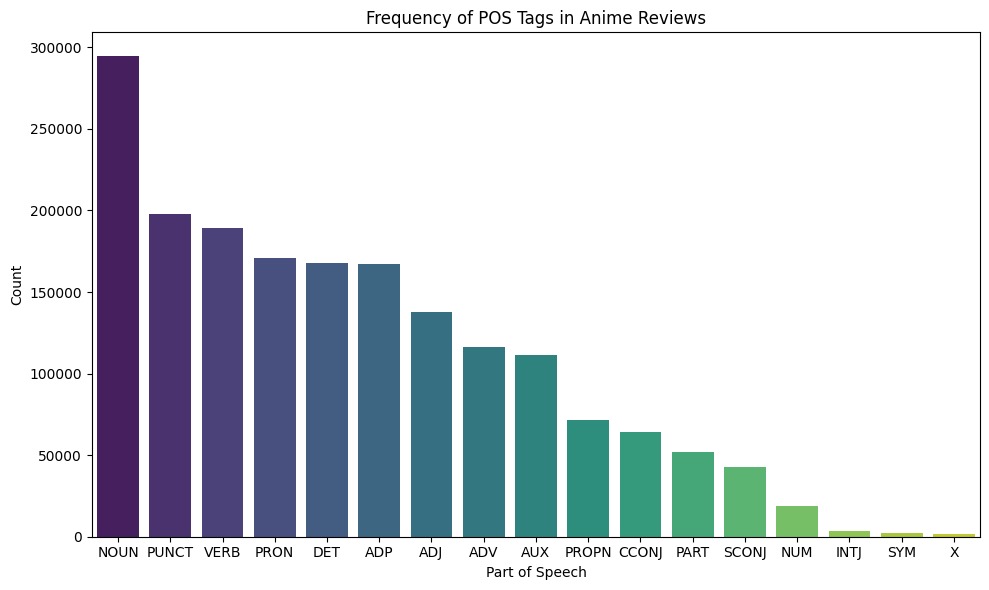

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(data=pos_df, x="POS", y="Count", palette="viridis")
plt.title("Frequency of POS Tags in Anime Reviews")
plt.xlabel("Part of Speech")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


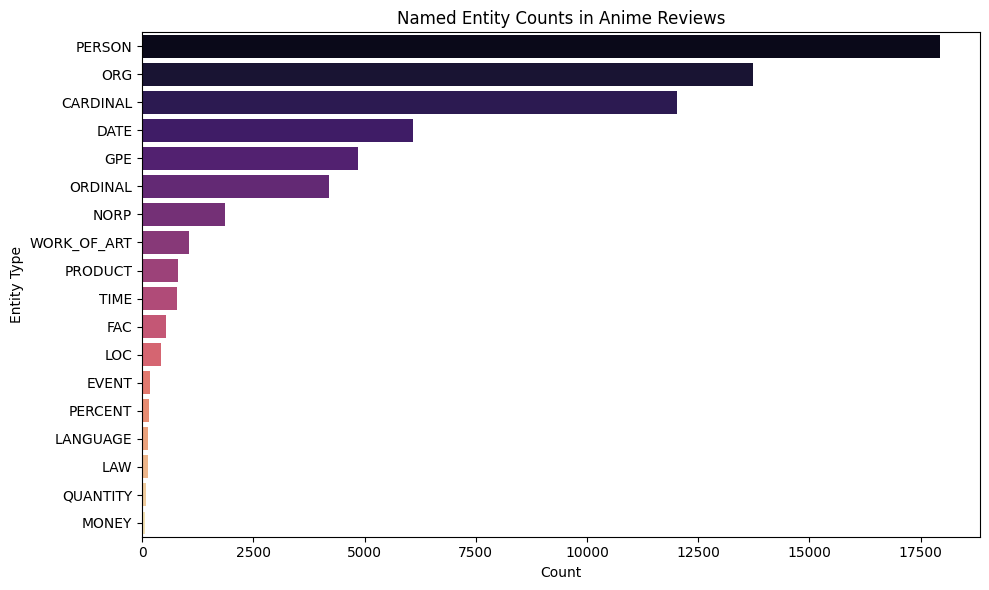

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(data=ner_df, y="Entity", x="Count", palette="magma")
plt.title("Named Entity Counts in Anime Reviews")
plt.xlabel("Count")
plt.ylabel("Entity Type")
plt.tight_layout()
plt.show()


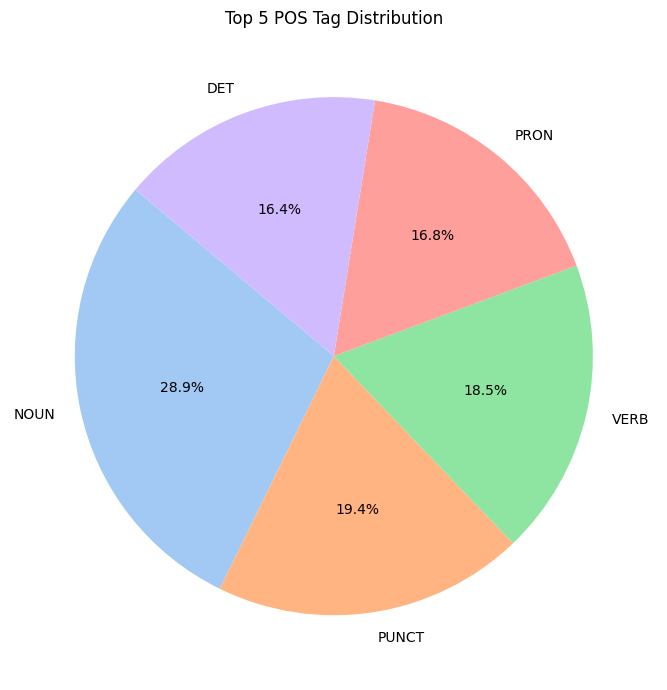

In [7]:
top5_pos = pos_df.head(5)

plt.figure(figsize=(7, 7))
plt.pie(top5_pos["Count"], labels=top5_pos["POS"], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Top 5 POS Tag Distribution")
plt.tight_layout()
plt.show()


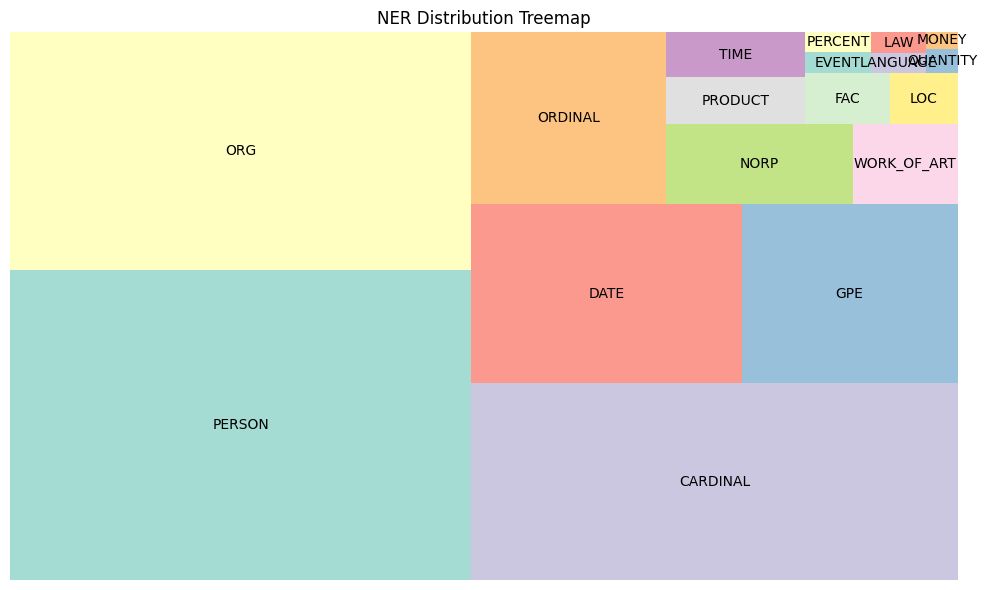

In [8]:
plt.figure(figsize=(10, 6))
squarify.plot(sizes=ner_df["Count"], label=ner_df["Entity"], alpha=.8, color=sns.color_palette("Set3", len(ner_df)))
plt.title("NER Distribution Treemap")
plt.axis('off')
plt.tight_layout()
plt.show()

In [9]:
text = df.loc[15, "review_nerpos"]
doc = nlp(text)

# Render to raw HTML
html = displacy.render(doc, style="ent", jupyter=False)

# Save to HTML file
with open("ner_visualization.html", "w", encoding="utf-8") as f:
    f.write(html)


In [10]:
doc = nlp(review)

# Collect POS and NER data
pos_dict = defaultdict(Counter)
ner_dict = defaultdict(Counter)

for token in doc:
    pos_dict[token.pos_][token.text.lower()] += 1

for ent in doc.ents:
    ner_dict[ent.label_][ent.text.lower()] += 1

def plot_wordcloud(counter, title):
    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(counter)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

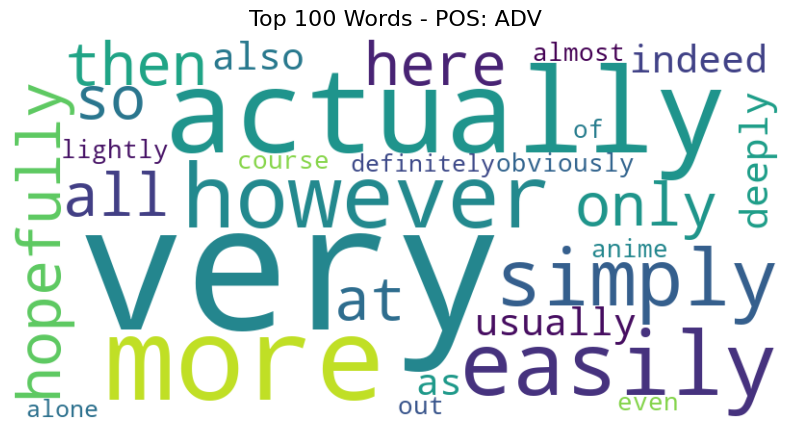

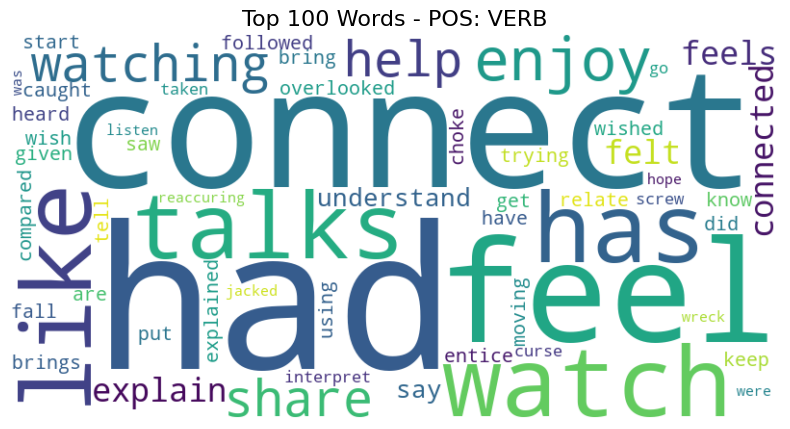

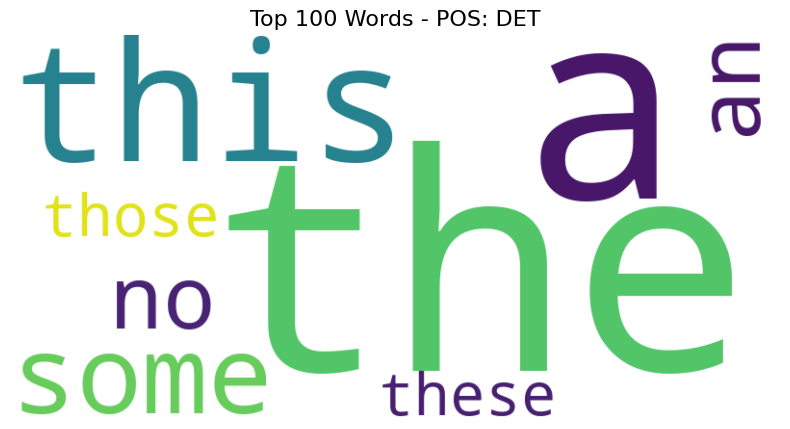

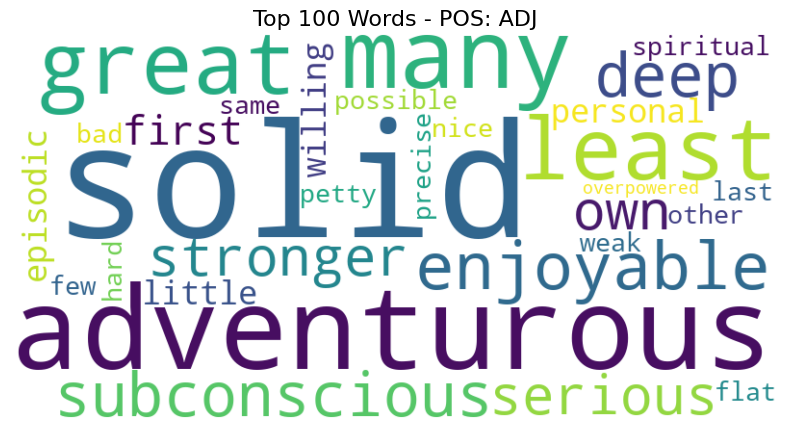

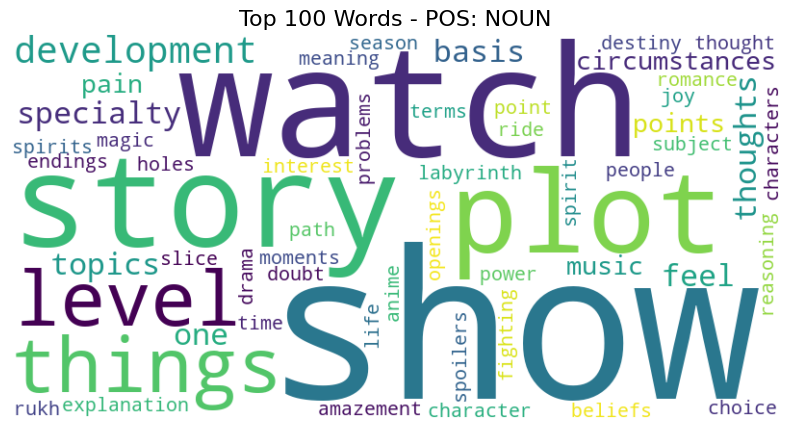

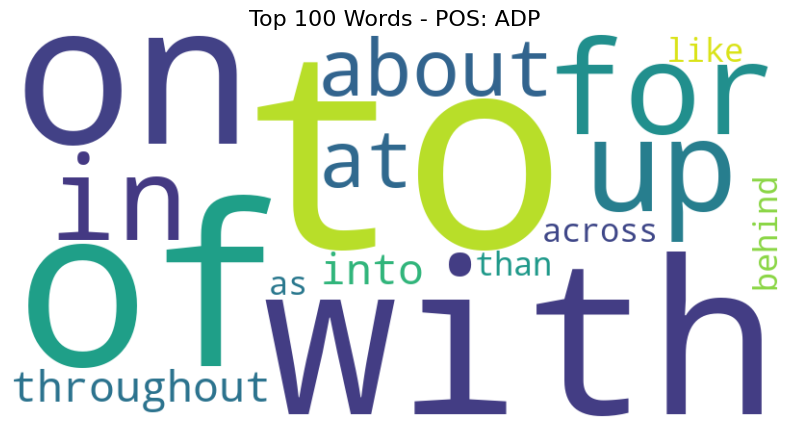

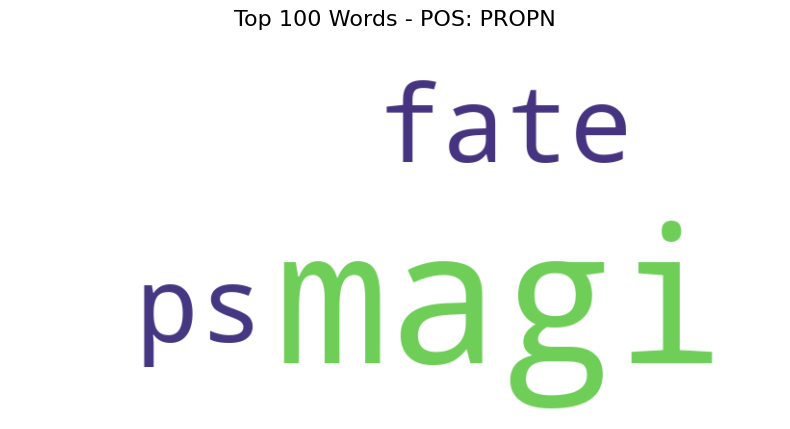

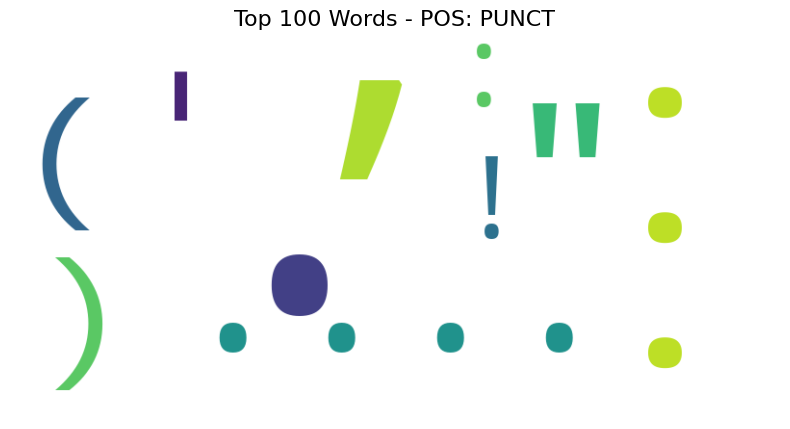

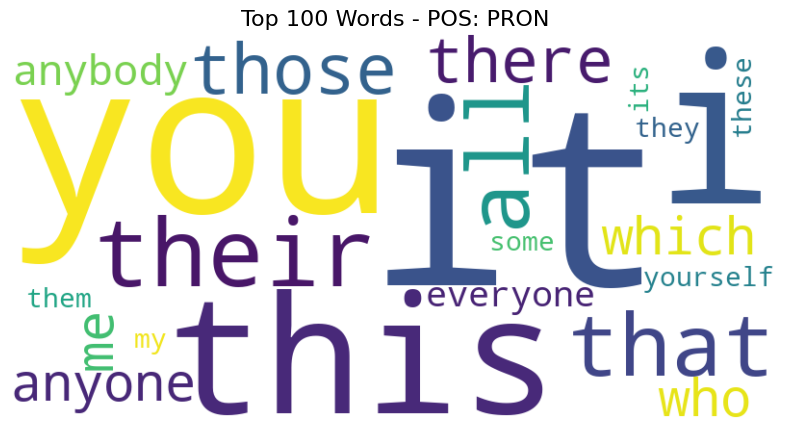

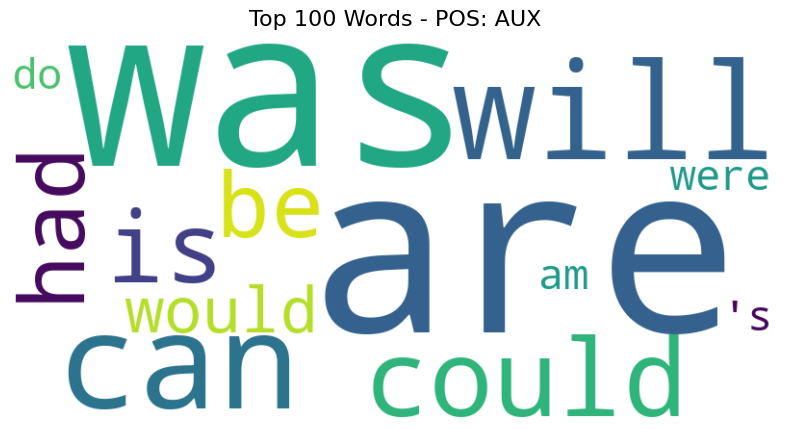

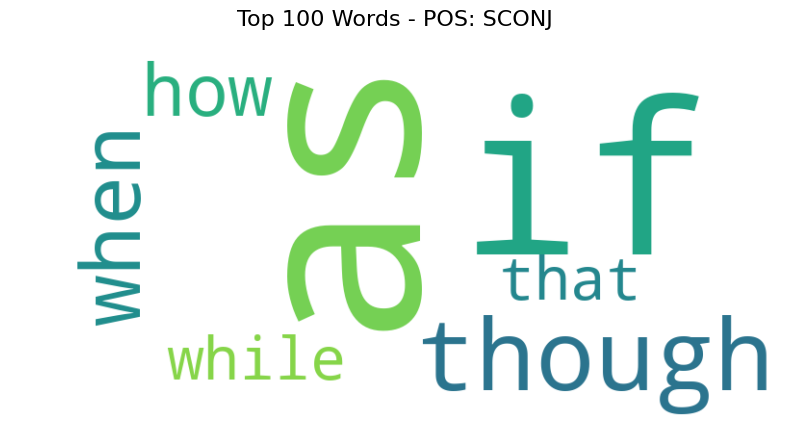

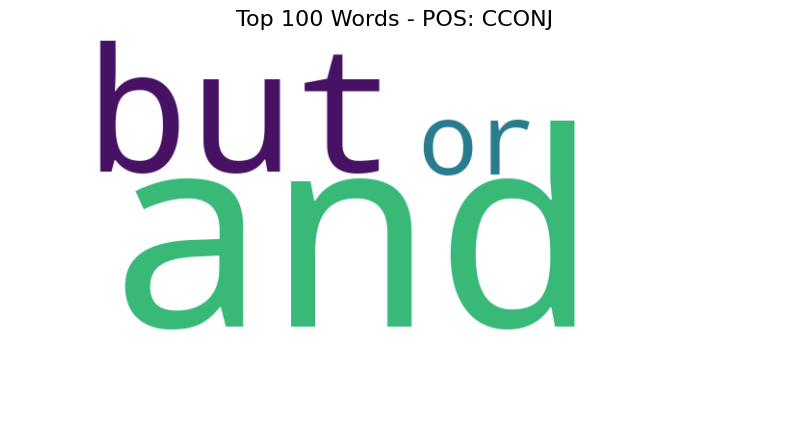

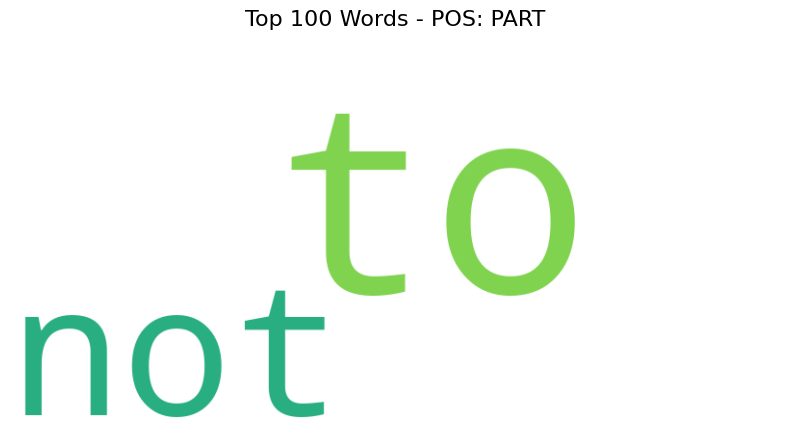

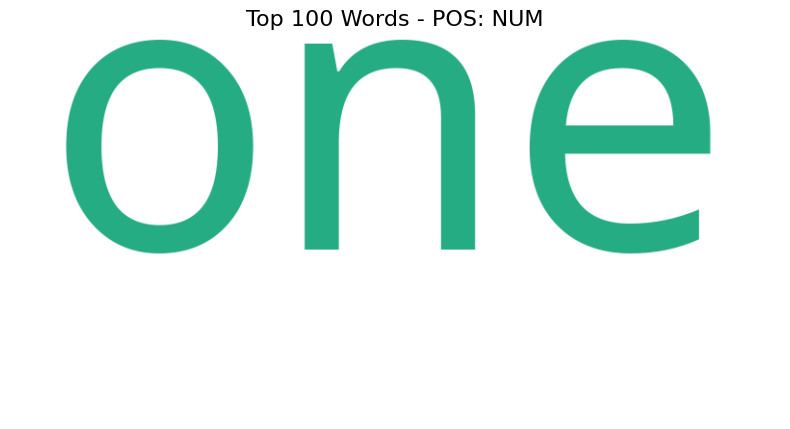

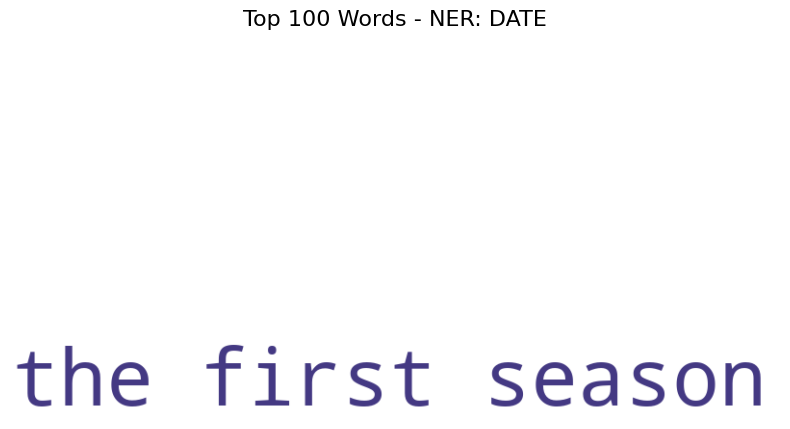

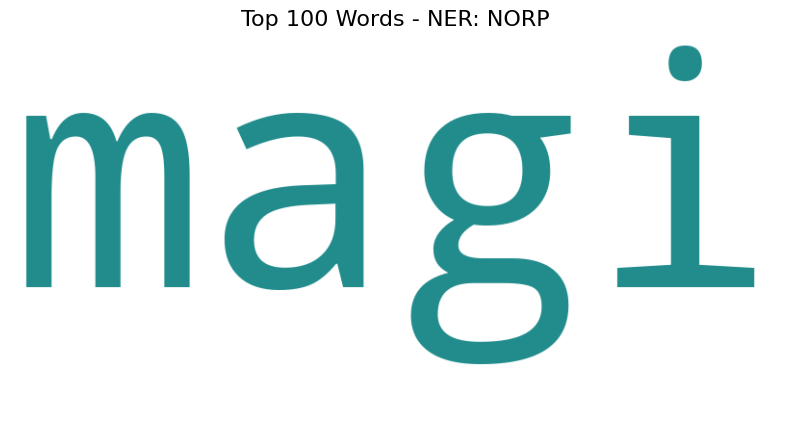

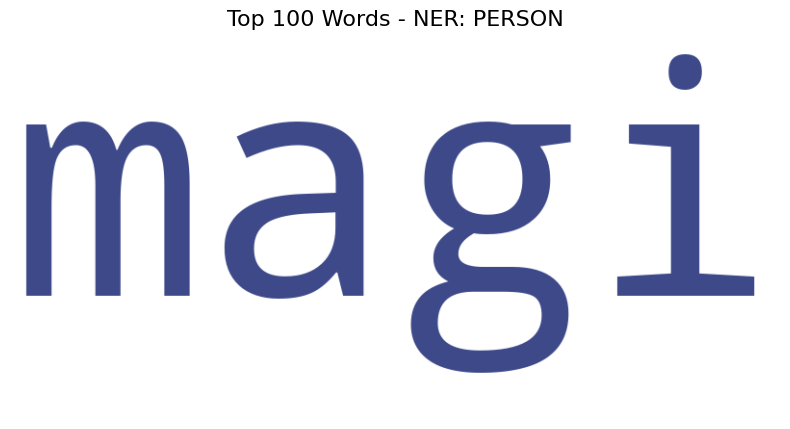

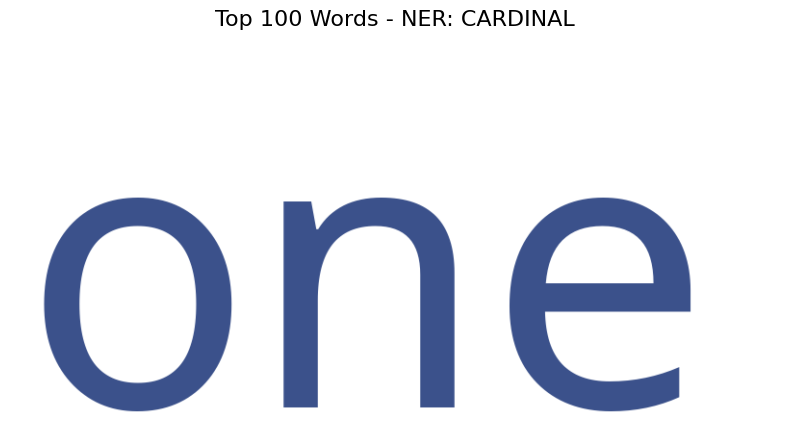

In [11]:
for pos in pos_dict:
    top_100 = dict(pos_dict[pos].most_common(100))
    plot_wordcloud(top_100, f"Top 100 Words - POS: {pos}")

for ner in ner_dict:
    top_100 = dict(ner_dict[ner].most_common(100))
    plot_wordcloud(top_100, f"Top 100 Words - NER: {ner}")